In [275]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [276]:
master_stocks=pd.read_csv(r"D:\PG-DAI\MachineLearning\Assessment\2 Stocks\Stocks.csv",index_col=0, parse_dates=True)


In [277]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalized = normalizer.fit_transform(master_stocks)
normalized = pd.DataFrame(normalized)

In [278]:
index = master_stocks.T.index
normalized.index = master_stocks.index
normalized = normalized.T
normalized.index = master_stocks.T.index
normalized = normalized.T

In [279]:

week_num = [x for x in range(0,963,7)]
custom_df = pd.DataFrame()
list = []
for i in week_num:
    if(i==7):
        Data15 = normalized.T.loc[index[0]:index[7]].mean()
        custom_df[i] = Data15
    else:
        Data15 = normalized.T.loc[index[i-7]:index[i]].mean()
#         list.append(Data15)
        custom_df[i] = Data15

In [280]:
del custom_df[0]

In [281]:
dataset = custom_df

In [282]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [283]:
pca=PCA()

In [284]:
pca.fit(dataset)
pca.explained_variance_ratio_

array([1.15185212e-01, 6.15639081e-02, 5.12857905e-02, 4.43884346e-02,
       4.30770972e-02, 3.87488686e-02, 3.42430288e-02, 3.36650169e-02,
       3.10300125e-02, 3.00252142e-02, 2.87179370e-02, 2.75829783e-02,
       2.47622471e-02, 2.33290120e-02, 2.21797676e-02, 2.14671271e-02,
       2.02166109e-02, 1.89381302e-02, 1.85677379e-02, 1.66693075e-02,
       1.55767530e-02, 1.54985450e-02, 1.49893165e-02, 1.47343943e-02,
       1.42167716e-02, 1.34904715e-02, 1.32006438e-02, 1.27980827e-02,
       1.19458882e-02, 1.12023852e-02, 1.10072857e-02, 1.06766159e-02,
       9.90735792e-03, 9.52003737e-03, 8.70162829e-03, 8.38759561e-03,
       7.64010473e-03, 7.50346872e-03, 7.08524827e-03, 6.36005399e-03,
       6.31054299e-03, 5.81817477e-03, 5.34920129e-03, 5.17916731e-03,
       5.07158041e-03, 4.73206830e-03, 4.59280172e-03, 4.30993672e-03,
       3.94484416e-03, 3.63569908e-03, 3.28619858e-03, 3.23031620e-03,
       2.66063975e-03, 2.46751949e-03, 2.31287811e-03, 2.20595761e-03,
      

In [285]:
pca.explained_variance_ratio_.cumsum()

array([0.11518521, 0.17674912, 0.22803491, 0.27242334, 0.31550044,
       0.35424931, 0.38849234, 0.42215736, 0.45318737, 0.48321258,
       0.51193052, 0.5395135 , 0.56427575, 0.58760476, 0.60978452,
       0.63125165, 0.65146826, 0.67040639, 0.68897413, 0.70564344,
       0.72122019, 0.73671874, 0.75170805, 0.76644245, 0.78065922,
       0.79414969, 0.80735033, 0.82014842, 0.8320943 , 0.84329669,
       0.85430398, 0.86498059, 0.87488795, 0.88440799, 0.89310962,
       0.90149721, 0.90913732, 0.91664078, 0.92372603, 0.93008609,
       0.93639663, 0.9422148 , 0.94756401, 0.95274317, 0.95781475,
       0.96254682, 0.96713962, 0.97144956, 0.9753944 , 0.9790301 ,
       0.9823163 , 0.98554662, 0.98820726, 0.99067478, 0.99298766,
       0.99519361, 0.99691478, 0.99847232, 1.        , 1.        ])

Text(0, 0.5, 'Cumulative Explained Variance')

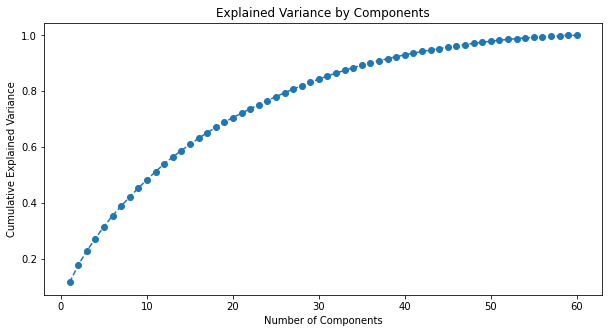

In [286]:
# Plot the cumulative variance explained by total number of components.

# On this graph we choose the subset of components we want to keep. 
# Generally, we want to keep around 80 % - 90% of the explained variance.
plt.figure(figsize=(10,5))

plt.plot (range (1,61), pca.explained_variance_ratio_.cumsum (), marker = 'o', linestyle = '--')

plt.title('Explained Variance by Components')

plt.xlabel('Number of Components')

plt.ylabel('Cumulative Explained Variance')

In [287]:
pca=PCA(n_components= 2)
pca.fit(dataset)
pca.explained_variance_ratio_


array([0.11518521, 0.06156391])

In [288]:
df= pca.transform(dataset)
print(df)
df1=np.transpose(df)
PCA1=df1[0]
PCA2=df1[1]

[[-0.0125523  -0.00680774]
 [-0.02154652 -0.0433906 ]
 [ 0.00975332  0.0124307 ]
 [-0.00740795 -0.00741061]
 [-0.00622924  0.00484245]
 [-0.05628879 -0.05996524]
 [ 0.03942691  0.048471  ]
 [-0.02088516  0.024726  ]
 [-0.06998658  0.0328736 ]
 [ 0.08210763 -0.00577556]
 [-0.01875792  0.04340521]
 [-0.0253272  -0.02467512]
 [-0.01932779  0.04288842]
 [-0.02748194  0.02518409]
 [-0.00930608 -0.00684038]
 [-0.04996844 -0.03394563]
 [-0.01757079 -0.00580819]
 [-0.00024993 -0.03041926]
 [-0.04453373 -0.04606934]
 [ 0.01808078  0.0234393 ]
 [ 0.02562705 -0.00734018]
 [-0.04506024  0.04461851]
 [-0.01940754 -0.02068468]
 [-0.00940203  0.0228709 ]
 [ 0.004076   -0.01671532]
 [ 0.05361492 -0.0297001 ]
 [-0.04536073 -0.03883196]
 [ 0.10228692 -0.0106367 ]
 [ 0.06570608 -0.00875662]
 [ 0.01392765  0.00993309]
 [ 0.02489042 -0.01671934]
 [ 0.05148864 -0.0165494 ]
 [-0.00140248  0.0112839 ]
 [-0.02783406 -0.01272733]
 [-0.01984208 -0.01830885]
 [-0.0428112  -0.01430388]
 [-0.00216387  0.01273555]
 

In [289]:
from sklearn.cluster import KMeans

In [290]:
sse = []
kmeans = range(1,10)
for k in kmeans:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)
    
print(sse)

[0.12268329268657943, 0.06737709569813136, 0.0384813208558734, 0.030777531641940203, 0.02452014371600446, 0.01818335111576915, 0.015948131658061224, 0.01344863846251134, 0.011488033595044989]


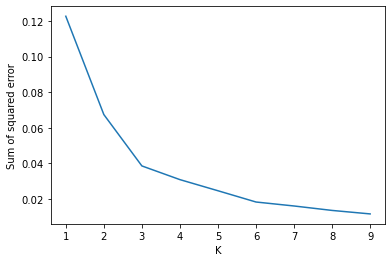

In [291]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(kmeans,sse)

In [292]:
km = KMeans(n_clusters=10)
y_predicted = km.fit_predict(df)
y_predicted

array([0, 6, 8, 0, 8, 6, 2, 4, 7, 1, 4, 0, 4, 4, 0, 6, 0, 9, 6, 2, 5, 7,
       0, 4, 9, 1, 6, 1, 1, 8, 5, 1, 8, 3, 0, 3, 8, 2, 1, 1, 1, 1, 2, 4,
       4, 3, 2, 9, 3, 4, 9, 0, 2, 3, 5, 3, 1, 2, 0, 9])

In [293]:
km.cluster_centers_

array([[-0.0166153 , -0.01086205],
       [ 0.06416811, -0.00975789],
       [ 0.01446156,  0.03914355],
       [-0.03443768, -0.00511224],
       [-0.020394  ,  0.02939907],
       [ 0.02787751, -0.01488559],
       [-0.04353964, -0.04444056],
       [-0.05752341,  0.03874606],
       [ 0.00277707,  0.01024514],
       [ 0.00232617, -0.02900897]])

In [294]:
df_plot= pd.DataFrame()
df_plot['pca1']=np.transpose(PCA1)
df_plot['pca2']=np.transpose(PCA2)
df_plot['cluster']=y_predicted
df_plot

,pca1,pca2,cluster
0,-0.012552,-0.006808,0
1,-0.021547,-0.043391,6
2,0.009753,0.012431,8
3,-0.007408,-0.007411,0
4,-0.006229,0.004842,8
5,-0.056289,-0.059965,6
6,0.039427,0.048471,2
7,-0.020885,0.024726,4
8,-0.069987,0.032874,7
9,0.082108,-0.005776,1


In [295]:
df_plot1 = df_plot[df_plot.cluster==0]
df_plot2 = df_plot[df_plot.cluster==1]
df_plot3 = df_plot[df_plot.cluster==2]
df_plot4 = df_plot[df_plot.cluster==3]
df_plot5 = df_plot[df_plot.cluster==4]
df_plot6 = df_plot[df_plot.cluster==5]
df_plot7 = df_plot[df_plot.cluster==6]
df_plot8 = df_plot[df_plot.cluster==7]
df_plot9 = df_plot[df_plot.cluster==8]
df_plot10 = df_plot[df_plot.cluster==9]

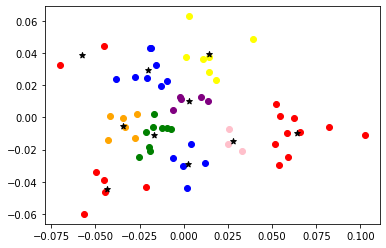

In [299]:
plt.scatter(df_plot1['pca1'],df_plot1['pca2'],color='green',label='cluster 1')
plt.scatter(df_plot2['pca1'],df_plot2['pca2'],color='red',label='cluster 2')
plt.scatter(df_plot3['pca1'],df_plot3['pca2'],color='yellow',label='cluster 3')
plt.scatter(df_plot4['pca1'],df_plot4['pca2'],color='orange',label='cluster 4')
plt.scatter(df_plot5['pca1'],df_plot5['pca2'],color='blue',label='cluster 5')
plt.scatter(df_plot6['pca1'],df_plot6['pca2'],color='pink',label='cluster 6')
plt.scatter(df_plot7['pca1'],df_plot7['pca2'],color='red',label='cluster 7')
plt.scatter(df_plot8['pca1'],df_plot8['pca2'],color='red',label='cluster 8')
plt.scatter(df_plot9['pca1'],df_plot9['pca2'],color='purple',label='cluster 9')
plt.scatter(df_plot10['pca1'],df_plot10['pca2'],color='blue',label='cluster 10')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
# plt.legend()

"C:\\Users\\God's Fav"